<a href="https://colab.research.google.com/github/hoangcuongnguyen2001/Income-Analysis/blob/main/Income_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px 
import warnings 
warnings.filterwarnings("ignore")


%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/hoangcuongnguyen2001/Income-Analysis/main/Income_Analysis/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# **Data preprocessing (first steps)**

*Finding data types for all columns*

In [2]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

**Finding missing values on analysis**

In [3]:
df[df=='?']=np.nan
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [5]:
null_columns =['workclass','occupation','native.country']
for i in null_columns:
    df.fillna(df[i].mode()[0], inplace=True)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Private,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Private,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


*Checking duplicates:*

In [7]:
data = df[df.duplicated()]
print(data)

       age         workclass  fnlwgt  ... hours.per.week  native.country income
8453    25           Private  308144  ...             40          Mexico  <=50K
8645    90           Private   52386  ...             35   United-States  <=50K
12202   21           Private  250051  ...             10   United-States  <=50K
14346   20           Private  107658  ...             10   United-States  <=50K
15603   25           Private  195994  ...             40       Guatemala  <=50K
17344   21           Private  243368  ...             50          Mexico  <=50K
19067   46           Private  173243  ...             40   United-States  <=50K
20388   30           Private  144593  ...             40         Private  <=50K
20507   19           Private   97261  ...             40   United-States  <=50K
22783   19           Private  138153  ...             10   United-States  <=50K
22934   19           Private  146679  ...             30   United-States  <=50K
23276   49           Private   31267  ..

In [8]:
df = df.drop_duplicates()
display(df.describe())

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# **Exploratory Data Analysis**

In [9]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [10]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


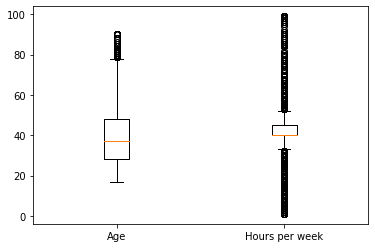

In [11]:
plt.boxplot([df['age'], df['hours.per.week']], labels = ['Age', 'Hours per week'])
plt.show()

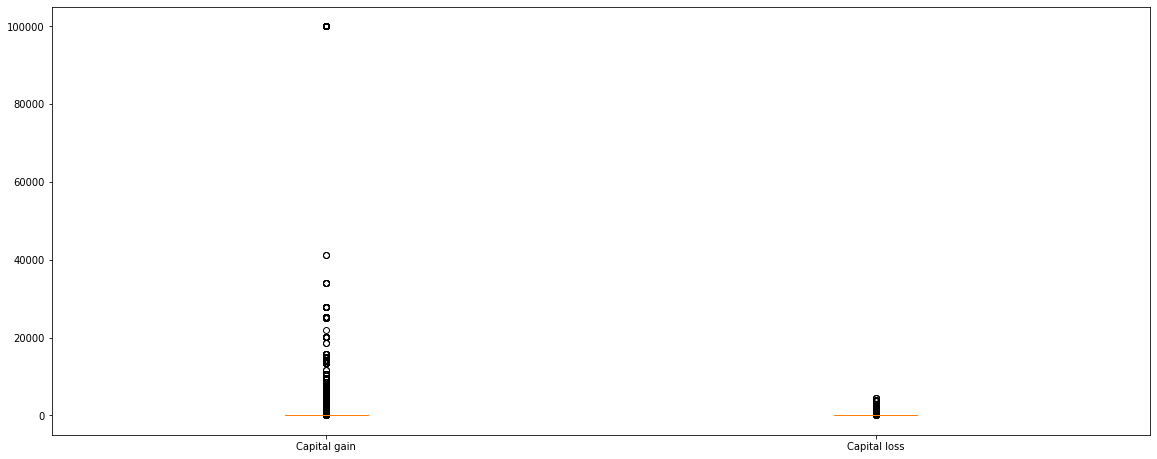

In [12]:
def cm_to_inch(value):
    return value/2.54


plt.figure(figsize=(cm_to_inch(50), cm_to_inch(20)))

plt.boxplot([df['capital.gain'], df['capital.loss']], labels = ['Capital gain', 'Capital loss'])
plt.show()

In [13]:
continuous = df.iloc[:, np.r_[0,2,10:13]]
categorical = df.iloc[:, np.r_[1,3:9]]

z_scores = stats.zscore(continuous)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
new_df.describe()
print(new_df)




       age  workclass  fnlwgt  ... hours.per.week  native.country income
1470    62  Local-gov  159908  ...             38   United-States  <=50K
1471    72  Local-gov  144515  ...             40   United-States  <=50K
1472    76    Private  224680  ...             20   United-States  <=50K
1473    66    Private  350498  ...             20   United-States  <=50K
1474    33  Local-gov  262042  ...             40   United-States  <=50K
...    ...        ...     ...  ...            ...             ...    ...
32556   22    Private  310152  ...             40   United-States  <=50K
32557   27    Private  257302  ...             38   United-States  <=50K
32558   40    Private  154374  ...             40   United-States   >50K
32559   58    Private  151910  ...             40   United-States  <=50K
32560   22    Private  201490  ...             20   United-States  <=50K

[30007 rows x 15 columns]


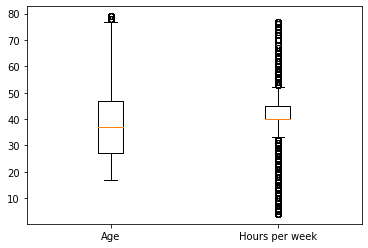

In [14]:
plt.boxplot([new_df['age'], new_df['hours.per.week']], labels = ['Age', 'Hours per week'])
plt.show()

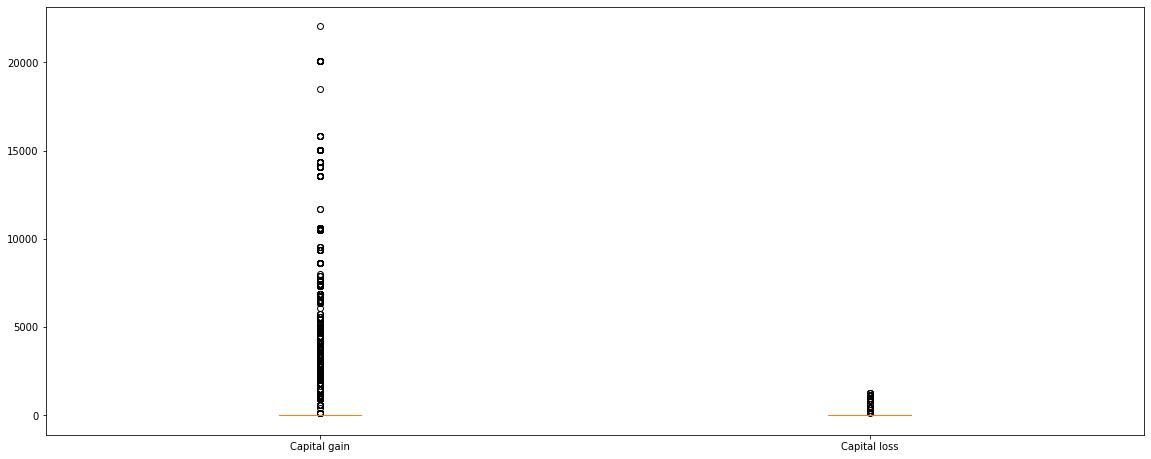

In [15]:
plt.figure(figsize=(cm_to_inch(50), cm_to_inch(20)))

plt.boxplot([new_df['capital.gain'], new_df['capital.loss']], labels = ['Capital gain', 'Capital loss'])
plt.show()

*Checking correlation*

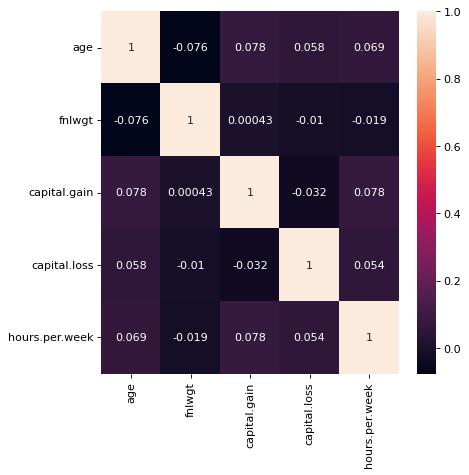

In [16]:
#First method: using correlation matrix
from matplotlib.pyplot import figure

figure(figsize = (6,6), dpi = 80)
corrMatrix = continuous.corr()
sns.heatmap(corrMatrix, annot = True)
plt.show()

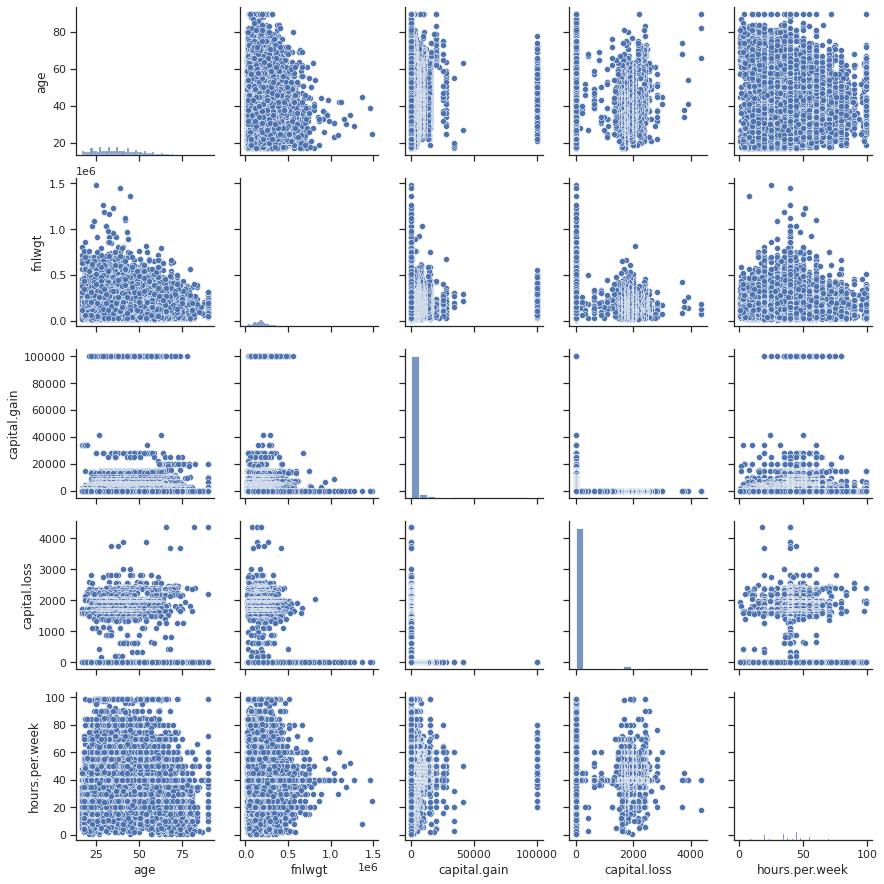

In [17]:
#Second method: using scatterplot matrix

sns.set_theme(style="ticks")
sns.pairplot(continuous)

*Checking skewness*

In [18]:
new_df.skew()

age                0.489091
fnlwgt             0.634684
education.num     -0.321953
capital.gain       4.955820
capital.loss      29.750899
hours.per.week    -0.349787
dtype: float64

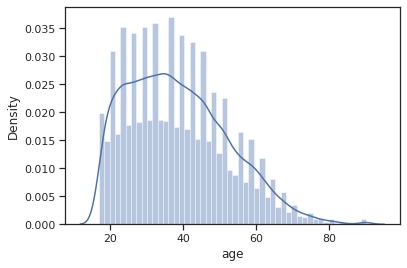

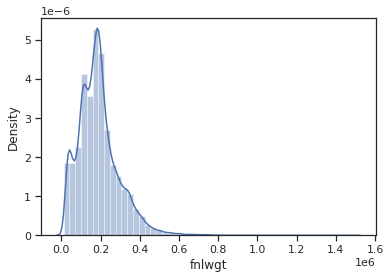

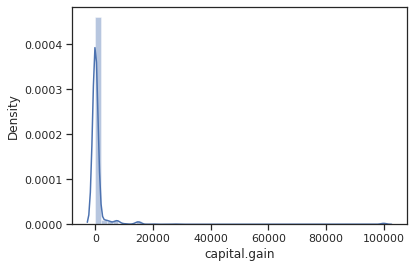

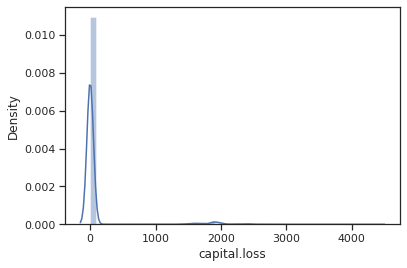

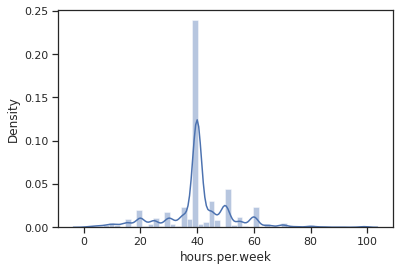

<Figure size 432x288 with 0 Axes>

In [19]:
for i in continuous:
    sns.distplot(df[i])
    plt.figure()

**Analysing variables**

Text(0, 0.5, 'No. of People')

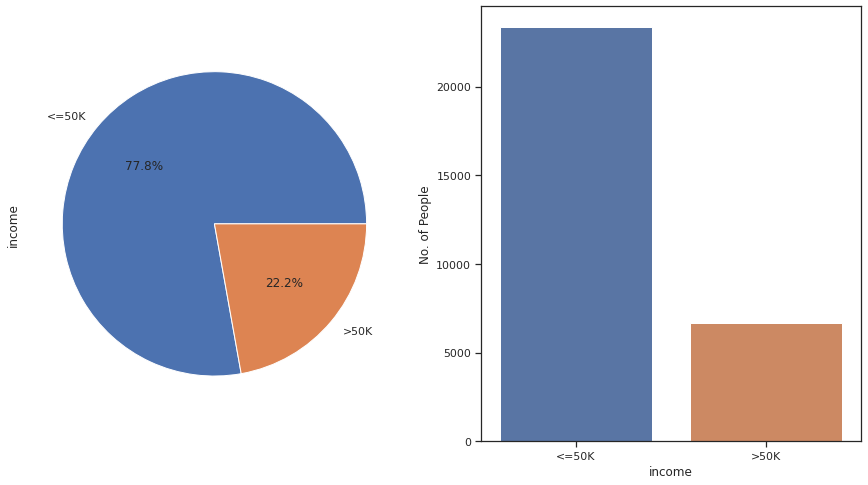

In [20]:

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
new_df['income'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(x='income',data=new_df)
plt.ylabel('No. of People')



Text(0, 0.5, 'No. of Individuals')

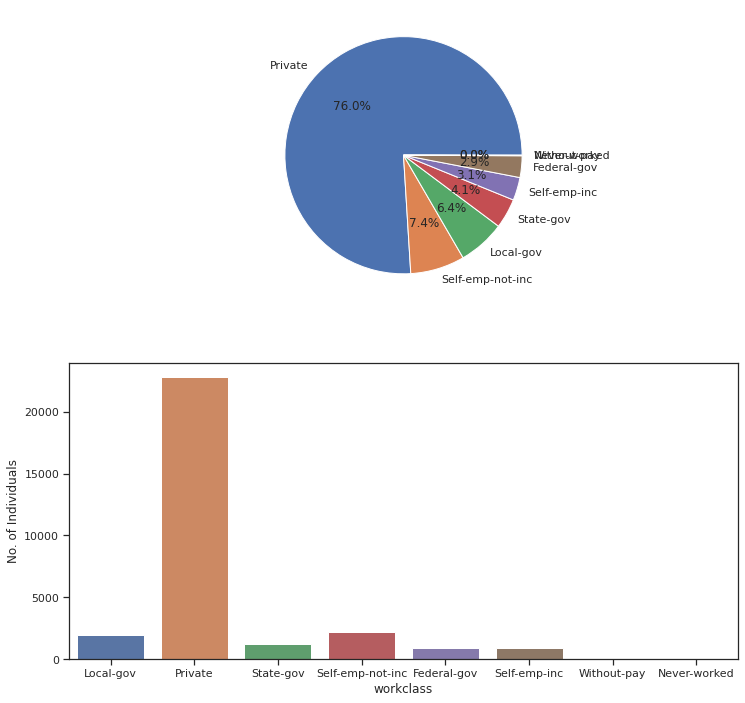

In [21]:

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
new_df['workclass'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='workclass',data=new_df)
plt.ylabel('No. of Individuals')

Text(0, 0.5, 'No. of Individuals')

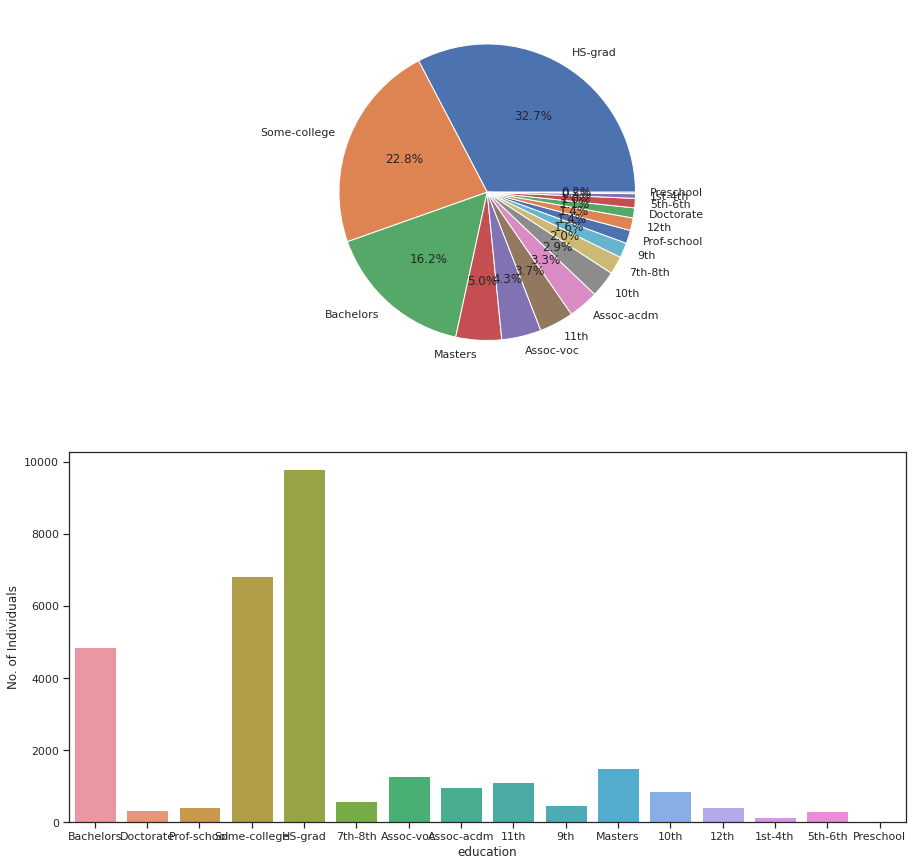

In [22]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
new_df['education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='education',data=new_df)
plt.ylabel('No. of Individuals')

Text(0, 0.5, 'No. of Individuals')

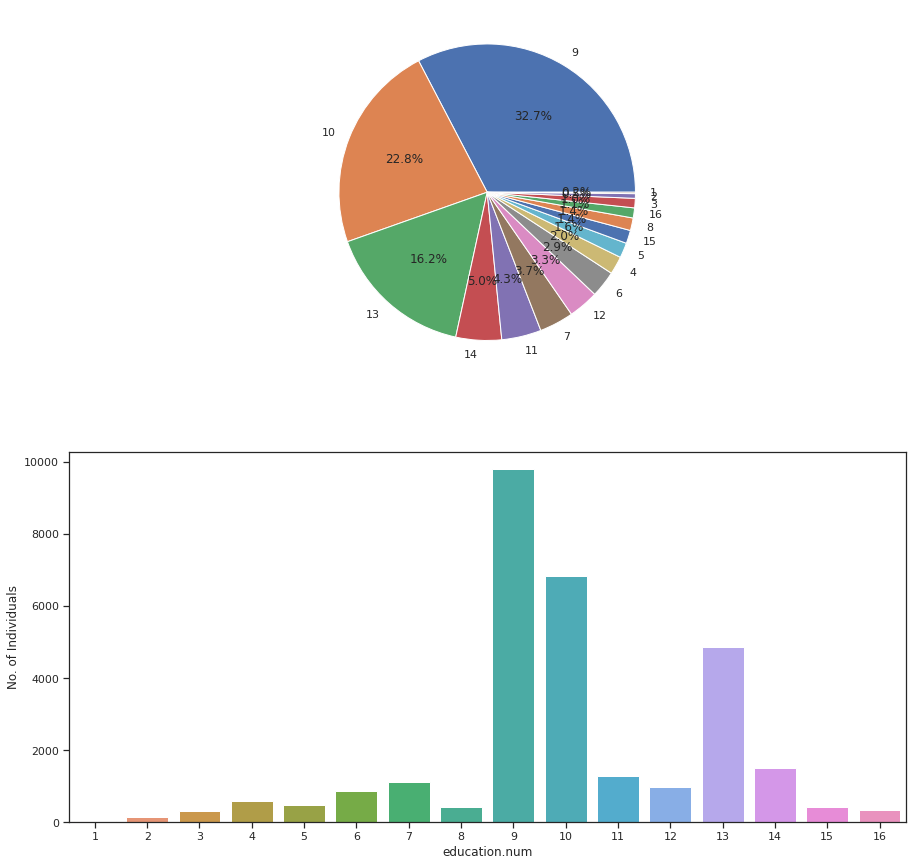

In [23]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
new_df['education.num'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='education.num',data=new_df)
plt.ylabel('No. of Individuals')

Text(0, 0.5, 'No. of Individuals')

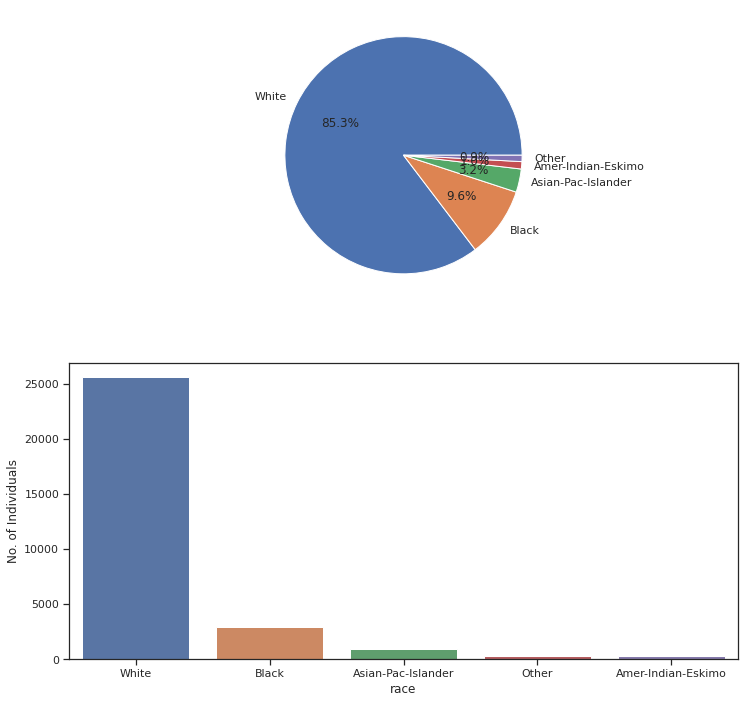

In [24]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
new_df['race'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.subplot(2,1,2)
sns.countplot(x='race',data=new_df)
plt.ylabel('No. of Individuals')

In [25]:
new_df['native.country'].value_counts()

United-States                 26881
Mexico                          602
Private                         520
Philippines                     182
Germany                         130
Canada                          110
Puerto-Rico                     108
El-Salvador                      97
Cuba                             90
India                            89
England                          83
Jamaica                          81
South                            70
Italy                            69
China                            67
Dominican-Republic               67
Vietnam                          63
Guatemala                        58
Poland                           57
Columbia                         56
Japan                            55
Taiwan                           44
Haiti                            42
Iran                             39
Portugal                         36
Peru                             29
France                           28
Nicaragua                   

Text(0, 0.5, 'Average age')

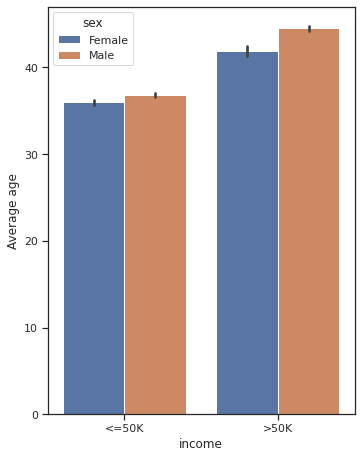

In [26]:
plt.figure(figsize=(5.5,7.5)) 
sns.barplot(x='income',y='age',hue='sex',data=new_df) 
plt.ylabel('Average age')

*Remove skewness*

In [27]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [28]:
for i in continuous:
    if np.abs(df[i].skew())>0.5:
        df[i]=pt.fit_transform(df[i].values.reshape(-1,1))

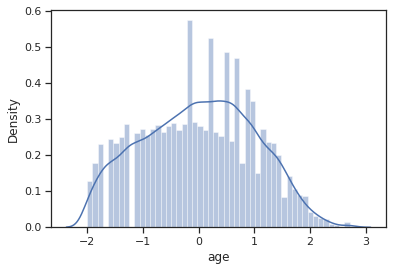

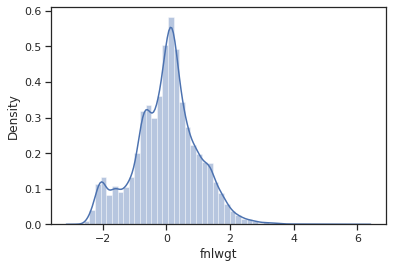

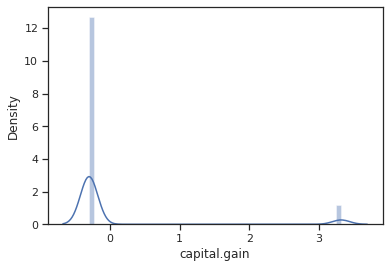

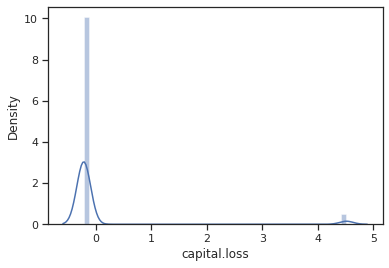

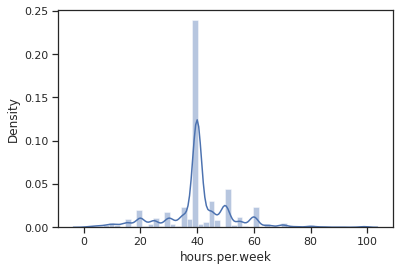

<Figure size 432x288 with 0 Axes>

In [29]:
for i in continuous:
    sns.distplot(df[i])
    plt.figure()

# **Encoding and rebalancing data**

*Encode dependent variable*

In [30]:

new_df.shape

(30007, 15)

In [31]:
new_df['income'].value_counts()

<=50K    23350
>50K      6657
Name: income, dtype: int64

In [32]:
#Create a checkpoint
new_df= new_df.copy()

new_df['income'] = new_df['income'].astype('str')
new_df['income'].replace(to_replace = ['<=50K', '>50K'], value =[0,1], inplace=True)
new_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1470,62,Local-gov,159908,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,1258,38,United-States,0
1471,72,Local-gov,144515,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1258,40,United-States,0
1472,76,Private,224680,Prof-school,15,Married-civ-spouse,Private,Husband,White,Male,0,1258,20,United-States,0
1473,66,Private,350498,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1258,20,United-States,0
1474,33,Local-gov,262042,HS-grad,9,Divorced,Adm-clerical,Own-child,White,Female,0,1138,40,United-States,0


In [33]:
new_df['income'].value_counts()


0    23350
1     6657
Name: income, dtype: int64

*Encode independent variable*

In [34]:
from sklearn.preprocessing import OrdinalEncoder
o=OrdinalEncoder()

for i in new_df.columns:
    if new_df[i].dtypes=='O' and i!='income':
        new_df[i]=o.fit_transform(new_df[i].values.reshape(-1,1))

new_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1470,62,1.0,159908,9.0,13,2.0,0.0,5.0,4.0,0.0,0,1258,38,38.0,0
1471,72,1.0,144515,10.0,16,2.0,3.0,0.0,4.0,1.0,0,1258,40,38.0,0
1472,76,3.0,224680,14.0,15,2.0,9.0,0.0,4.0,1.0,0,1258,20,38.0,0
1473,66,3.0,350498,15.0,10,2.0,14.0,0.0,4.0,1.0,0,1258,20,38.0,0
1474,33,1.0,262042,11.0,9,0.0,0.0,3.0,4.0,0.0,0,1138,40,38.0,0


*Rebalance the dataset*

In [35]:

from sklearn.utils import resample

# Separate majority and minority classes
new_df_majority = new_df[new_df["income"]==0]
new_df_minority = new_df[new_df["income"]==1]
 
# Upsample minority class
new_df_minority_upsampled = resample(new_df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=23350,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
new_df_upsampled = pd.concat([new_df_majority, new_df_minority_upsampled])
 
# Display new class counts
new_df_upsampled['income'].value_counts()


1    23350
0    23350
Name: income, dtype: int64

In [36]:
X=new_df_upsampled.copy()
X.drop('income',axis=1,inplace=True)
Y=new_df_upsampled['income']

print(X)

       age  workclass  fnlwgt  ...  capital.loss  hours.per.week  native.country
1470    62        1.0  159908  ...          1258              38            38.0
1471    72        1.0  144515  ...          1258              40            38.0
1472    76        3.0  224680  ...          1258              20            38.0
1473    66        3.0  350498  ...          1258              20            38.0
1474    33        1.0  262042  ...          1138              40            38.0
...    ...        ...     ...  ...           ...             ...             ...
9326    25        3.0  176729  ...             0              60            38.0
15289   39        3.0  191342  ...             0              40            28.0
2745    54        3.0  225599  ...             0              40            17.0
14441   34        1.0   97723  ...             0              40            38.0
30808   31        1.0  189843  ...             0              47            38.0

[46700 rows x 14 columns]


*Create a custom scaler (based on StandardScaler)*

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

transformer = make_column_transformer(
    (StandardScaler(), ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']),
    remainder='passthrough'
)

new_df_upsampled = pd.DataFrame(transformer.fit_transform(new_df_upsampled), columns=new_df_upsampled.columns)
print(new_df_upsampled)

            age  workclass    fnlwgt  ...  hours.per.week  native.country  income
0      1.706048  -0.267737 -0.333059  ...             0.0            38.0     0.0
1      2.493451  -0.431635 -0.333059  ...             1.0            38.0     0.0
2      2.808412   0.421927 -0.333059  ...             1.0            38.0     0.0
3      2.021009   1.761581 -0.333059  ...             1.0            38.0     0.0
4     -0.577419   0.819741 -0.333059  ...             0.0            38.0     0.0
...         ...        ...       ...  ...             ...             ...     ...
46695 -1.207341  -0.088634 -0.333059  ...             1.0            38.0     1.0
46696 -0.104977   0.066959 -0.333059  ...             1.0            28.0     1.0
46697  1.076126   0.431712  1.861162  ...             1.0            17.0     1.0
46698 -0.498679  -0.929855 -0.333059  ...             1.0            38.0     1.0
46699 -0.734900   0.050998 -0.333059  ...             1.0            38.0     1.0

[46700 rows x 1

# **Partition data into training and test set**

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, shuffle = True, random_state = 42)

print(X_train.shape[0])
print(X_test.shape[0])
print(X_train)

42030
4670
       age  workclass  fnlwgt  ...  capital.loss  hours.per.week  native.country
24858   64        3.0  342494  ...             0              40            38.0
24526   59        4.0  103948  ...             0              60            38.0
13129   24        3.0   47791  ...             0              32            38.0
3670    39        3.0  127772  ...             0              44            38.0
4026    34        3.0  133503  ...             0              40            38.0
...    ...        ...     ...  ...           ...             ...             ...
17206   19        3.0   86150  ...             0              19            28.0
2074    38        3.0  114591  ...             0              40            38.0
16115   42        3.0  154374  ...             0              50            38.0
4043    31        3.0  187560  ...             0              40            38.0
22938   28        5.0  282398  ...             0              35            38.0

[42030 rows x 14

# **Model implementation**

*Logistic regression*

Finding suitable parameters

In [39]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


dir(LogisticRegression)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 'decision_function',
 'densify',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'sparsify']

In [40]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 500, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(X_train, Y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 50}

0.616 (+/-0.067) for {'C': 0.001}
0.628 (+/-0.1) for {'C': 0.01}
0.624 (+/-0.086) for {'C': 0.1}
0.624 (+/-0.086) for {'C': 1}
0.626 (+/-0.091) for {'C': 10}
0.632 (+/-0.107) for {'C': 50}
0.628 (+/-0.095) for {'C': 100}
0.628 (+/-0.095) for {'C': 500}
0.628 (+/-0.097) for {'C': 1000}


In [41]:
best_lr = cv.best_estimator_
best_lr

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*Random forest classifier*

In [42]:
from sklearn.ensemble import RandomForestClassifier
dir(RandomForestClassifier)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_required_parameters',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'decision_path',
 'feature_importances_',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params']

In [43]:
rf = RandomForestClassifier(random_state=20)
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, Y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 50}

0.773 (+/-0.016) for {'max_depth': 2, 'n_estimators': 5}
0.763 (+/-0.009) for {'max_depth': 2, 'n_estimators': 50}
0.77 (+/-0.009) for {'max_depth': 2, 'n_estimators': 250}
0.795 (+/-0.014) for {'max_depth': 4, 'n_estimators': 5}
0.807 (+/-0.012) for {'max_depth': 4, 'n_estimators': 50}
0.809 (+/-0.011) for {'max_depth': 4, 'n_estimators': 250}
0.825 (+/-0.009) for {'max_depth': 8, 'n_estimators': 5}
0.83 (+/-0.012) for {'max_depth': 8, 'n_estimators': 50}
0.831 (+/-0.013) for {'max_depth': 8, 'n_estimators': 250}
0.883 (+/-0.004) for {'max_depth': 16, 'n_estimators': 5}
0.891 (+/-0.006) for {'max_depth': 16, 'n_estimators': 50}
0.892 (+/-0.005) for {'max_depth': 16, 'n_estimators': 250}
0.913 (+/-0.007) for {'max_depth': 32, 'n_estimators': 5}
0.928 (+/-0.005) for {'max_depth': 32, 'n_estimators': 50}
0.928 (+/-0.008) for {'max_depth': 32, 'n_estimators': 250}
0.913 (+/-0.005) for {'max_depth': None, 'n_estimators': 5}
0.93 (+/-0.0

In [44]:
best_rf = cv.best_estimator_
best_rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

*Gradient boosting*

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_train, Y_train.values.ravel())

print_results(cv)